# ECON526: Quantitative Economics with Data Science Applications

Practical Uses of Directed Graphical Models

Phil Solimine (University of British Columbia)

# Overview

## Summary

-   Previously in the course, we introduced Directed Acyclic Graphs as a
    way to represent conditional independence relationships between
    variables.

-   We built a DAG to represent the causal relationships between
    variables in a simple model of online learning.

-   We used this example to discuss how we can use DAGs to build a
    causal model of a data generating process.

    -   We also discussed some techniques to build concise models
        without losing too much information.

-   Today, we will discuss how these DAGs can actually be used in
    practice, both to identify causal effects, and to reduce the
    representational complexity of a model.

# Dependence Flows

## Dependence Flows

-   In order to determine whether or not we can identify a treatment
    effect, we need to understand how dependence **flows** through a
    graphical model.

-   We have seen that conditioning on a node can either make or break
    the dependence relationship between two other nodes

-   To identify the treatment effect, we want the *link between the
    treatment and the outcome to be unblocked*.

-   However, we also need to make sure that there is *no other
    dependence path* between the treatment and the outcome that is
    unblocked.

## The Rules of Bayes-Ball

-   We can think about the flow of dependence as a game of “Bayes-ball”
-   The rules of Bayes-ball are reasonably simple. A dependence path is
    blocked if and only if:
    1.  It contains a *non-collider* that is conditioned on
    2.  It contains a *collider* that is not conditioned on, and neither
        are *any of its descendants*

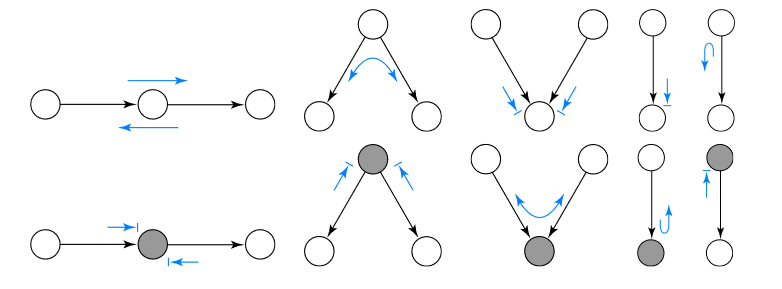

## Directed Graphical Models

Turning back to our **collider** example:

In [2]:
import graphviz as gr
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", style="filled")

-   Notice that when we do not condition on $C$, $A$ and $B$ are
    independent.
-   However, somewhat unintuitively, when we condition on $X$, $Y$ and
    $Z$ become dependent.
    -   This is because conditioning on $X$ opens the flow of dependence
        from $Y$ to $Z$.
    -   In any case that is *not* a collider, conditioning on a node
        *blocks* the flow of dependence.

## Two Games of Bayes Ball

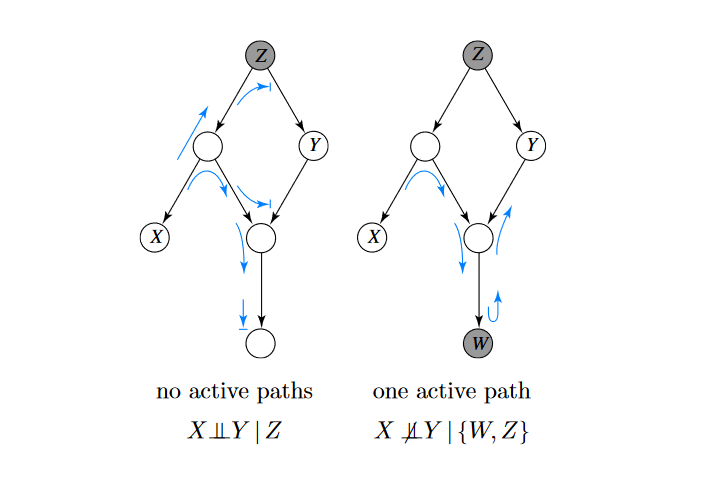

# Viualizing Bias

## Bias and Causality

-   In a causal inference framework, we can use graphical models to
    determine whether or not we can identify a treatment effect, and
    which covariates we need to condition on.

-   Typically, drawing out a graphical model is not necessary, but it
    can be a useful exercise to help you think through the problem.

    -   The links you draw represent the assumptions you are making
        about the data generating process

## Bias and Causality

-   There are two major types of bias that we need to worry about in
    causal inference:
    -   **Confounding**: When there is an unobserved variable that is a
        common cause of both the treatment and the outcome
    -   **Selection**: When there is an unobserved variable that is a
        common cause of both the treatment and the selection into the
        sample
-   Both of these types of bias can be represented using a graphical
    model

# Confounding

## Confounding

-   Let’s look at an example of confounding:

In [3]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("rain", "umbrella")
g.edge("rain", "wet")
g.edge("umbrella", "wet")

g.edge("severeness", "medicine")
g.edge("severeness", "survived")
g.edge("medicine", "survived")
g

-   To control for confounding, we need to condition on all of the
    common causes of the treatment and the outcome.

## Confounding

In [4]:
g = gr.Digraph()

g.node("Family Income")
g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")

g.node("SAT")
g.edge("SAT", "Educ")

g.node("Family Income")
g.edge("Family Income", "Wage")

g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

-   Often, there are confounding variables that we cannot observe
    -   For example, we cannot observe intelligence, but it is a common
        cause of both education (the treatment) and wages

## Confounding

In [5]:
g = gr.Digraph()

g.node("Family Income", style="filled")
g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")

g.node("SAT", style="filled")
g.edge("SAT", "Educ")

g.node("Family Income", style="filled")
g.edge("Family Income", "Wage")

g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

-   Often, there are confounding variables that we cannot observe
    -   For example, we cannot observe intelligence, but it is a common
        cause of both education (the treatment) and wages
    -   But we can use SAT as a **surrogate** or **proxy** for
        intelligence.

# Selection

## Selection

-   Selection bias often occurs when there is an unobserved variable
    that is a common cause of both the treatment and the selection into
    the sample, in other words, by conditioning on a variable that you
    shouldn’t.

In [6]:
g = gr.Digraph()
g.node("X", style="filled")
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("Investments", "Investments", style="filled")
g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")
g.node("Educ2", "Educ")
g.node("Wage2", "Wage")
g.node("Investments2", "Investments")
g.edge("Educ2", "Wage2")
g.edge("Wage2", "Investments2")
g.edge("Educ2", "Investments2")
g.node("CapitalGainsTax", "CapitalGainsTax", style="filled")
g.edge("Investments2", "CapitalGainsTax")
g

## Selection

-   Selection bias can also occur when controlling for a **mediator**
    between the treatment and the outcome

In [7]:
g = gr.Digraph()

g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", style="filled")

g.edge('Educ', 'WhiteCollar')
g.edge('Educ', 'Wage')
g.edge('WhiteCollar', 'Wage')
g.node('WhiteCollar', style="filled")

g

# Choosing Covariates

## Choosing Covariates

-   With these types of bias in mind, we can think about how to choose
    which covariates to condition on.

-   Notice that some controls will reduce bias, as in the case of
    confounding,

-   But *not all controls are good!* Some controls will actually create
    bias, as in the case of selection.

-   This means that we don’t want to just “throw the kitchen sink” at
    the problem, and include every variable we can think of.

## Choosing Covariates

-   We want to choose covariates that will close any unblocked secondary
    dependence paths between the treatment and the outcome, but not open
    any new ones.

-   To do this, we can use the “front door criterion” and the “back door
    criterion”

## The Front Door Criterion

-   The **front door criterion** is one way to isolate the effect of a
    treatment on an outcome, when there is a confounder and a mediator
    between the treatment and the outcome.

In [8]:
g = gr.Digraph()
g.edge("LotsOfStuff", "Smoking")
g.edge("LotsOfStuff", "LungCancer")
g.edge("Smoking", "Tar", style="dashed")
g.edge("Tar", "LungCancer", style="dashed")

g

## The Front Door Criterion

``` python
g = gr.Digraph()
g.edge("LotsOfStuff", "Smoking")
g.edge("LotsOfStuff", "LungCancer")
g.edge("Smoking", "Tar", style="dashed")
g.edge("Tar", "LungCancer", style="dashed")

g
```



-   In this example, we want to know the effect of smoking on lung
    cancer, but we also know that there are lots of variables (like
    stress), that cause both the treatment and the outcome.

-   However, stress does not cause tar, so we can condition on tar.

    -   This works by first measuring the effect of tar on lung cancer,
        and *then* the effect of smoking on tar.

## The Back Door Criterion

-   It’s pretty rare that we’ll actually be able to use the front door
    criterion, because we usually don’t have a mediator that we can
    condition on.

-   Instead, we can close all of the “back door paths” from treatment to
    outcome. We have already seen an example of this.

In [10]:
g = gr.Digraph()

g.node("Family Income", style="filled")
g.edge("Family Income", "Educ")
g.edge("Educ", "Wage", style="dashed")

g.node("SAT", style="filled")
g.edge("SAT", "Educ")

g.node("Family Income", style="filled")
g.edge("Family Income", "Wage")

g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

## Choosing Covariates: Two Examples

In [11]:
g = gr.Digraph()
g.edge("T", "Y", style="dashed")
g.edge("X", "Y")
g

-   Do we need to condition on $X$?

## Choosing Covariates: Two Examples

In [12]:
g = gr.Digraph()
g.edge("T", "Y", style="dashed")
g.edge("X", "Y")
g

-   Do we need to condition on $X$?
    -   No, not necessarily. There is no unblocked dependence path
        between $T$ and $Y$ that goes through $X$.
    -   However, conditioning on $X$ will reduce the variance of our
        estimate!
    -   If we didn’t condition on $X$, it would become part of our
        estimation error. But since $X \perp T$, it won’t bias our
        estimate.

## Choosing Covariates: Two Examples

In [13]:
g = gr.Digraph()
g.edge("R", "T")
g.edge("C", "T")
g.edge("C", "Y")
g.edge("T", "Y", style="dashed")
g

-   Suppose we don’t have any data on $C$. Can we identify the treatment
    effect?
    -   Yes! If we look at the effect of $R$ on $Y$, we can see that it
        is unblocked.
    -   Furthermore, since $R$ only affects $Y$ through $T$, the effect
        of $R$ on $Y$ is the same as the effect of $T$ on $Y$.
    -   This is called an **instrumental variable**.

# Factorizing the Joint Distribution

## Factorizing the Joint Distribution

-   We have seen how these graphical models can be used to determine
    whether or not we can identify a treatment effect.

-   However, we can also use them as a computational tool, to help us
    find the simplest representation of the joint distribution of the
    data.

-   This is useful because it allows us to find the simplest model that
    is consistent with our assumptions about conditional independence.

## Factorizing the Joint Distribution

-   To understand why this is useful, we’ll follow this example (from
    [Mark
    Paskin](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf)).

-   Suppose we have a DGP with five variables:

    1.  $E\in\{true, false\}$ - Has an earthquake happened? *Earthquakes
        are unlikely*
    2.  $B\in\{true, false\}$ - Has a burglary happened? *Burglaries are
        unlikely, but more likely than earthquakes*
    3.  $A\in\{true, false\}$ - Is the alarm going off? *The alarm is
        triggered by both earthquakes and burglaries*
    4.  $J\in\{true, false\}$ - Is John calling? *John calls when he
        hears the alarm, but he often misses it*
    5.  $M\in\{true, false\}$ - Is Mary calling? *Mary calls when she
        hears the alarm, but she also calls to chat*

## Factorizing the Joint Distribution

-   The goal is to compute $P(B|J=true)$ from the joint distribution
    $P(E,B,A,J,M)$. We’ll start by drawing the graphical model, to
    understand the conditional independence relationships.

In [14]:
g = gr.Digraph()
g.edge("E", "A")
g.edge("B", "A")
g.edge("A", "J")
g.edge("A", "M")

g

## Factorizing the Joint Distribution

In [15]:
g

-   In order to represent the full joint distribution, we could use the
    chain rule of probabilities:

$$
P(E,B,A,J,M) = P(E)P(B|E)P(A|E,B)P(J|E,B,A)P(M|E,B,A,J)
$$

-   Q: How many probabilities would we need to compute to represent the
    joint distribution this way?

## Factorizing the Joint Distribution

In [16]:
g

-   In order to represent the full joint distribution, we could use the
    chain rule of probabilities:

$$
\underbrace{P(E,B,A,J,M)}_{31} = \underbrace{P(E)}_{1} \underbrace{P(B|E)}_{2} \underbrace{P(A|E,B)}_{4} \underbrace{P(J|E,B,A)}_{8} \underbrace{P(M|E,B,A,J)}_{16}
$$

-   Q: How many probabilities would we need to store to represent the
    joint distribution this way?
    -   A: There are $2^5$ possible outcomes. We need 31 probabilities.
        (why not 32?)

## Factorizing the Joint Distribution

In [17]:
g

-   However, we can use the conditional independence relationships to
    simplify this representation.
    -   For example, we know that $P(B|E) = P(B)$, because $B$ and $E$
        are independent.
    -   We also know that $P(A|E,B) = P(A|B)$, because $A$ is
        independent of $E$, given $B$.
-   This means that we can simplify the joint distribution to:

$$
\underbrace{P(E,B,A,J,M)}_{10} = \underbrace{P(E)}_1 \underbrace{P(B)}_1 \underbrace{P(A|E,B)}_4 \underbrace{P(J|A)}_2 \underbrace{P(M|A)}_2
$$

## Factorizing the Joint Distribution

-   Beyond causal inference, graphical models are a useful tool for
    computing all kinds of conditional probabilities.

-   This is useful in many inference problems, and in structural
    econometrics

    -   The **likelihood function** is the conditional probability of
        the data, given the parameter values
    -   In Bayesian inference the **posterior** is the conditional
        probability of the parameters, given the data (and our priors)

## Variable Elimination

-   In order to simplify a conditional distribution, we can use
    **variable elimination**.

-   For example, let’s say we want to compute the probability of a
    burglary, given that John calls.

$$
\begin{aligned}
&p_{B \mid J}(b, \text { true })  \propto \sum_e \sum_a \sum_m p_{E B A J M}(e, b, a, \text { true }, m) \\
& =\sum_e \sum_a \sum_m p_E(e) \cdot p_B(b) \cdot p_{A \mid E B}(a, e, b) \cdot p_{J \mid A}(\text { true }, a) \cdot p_{M \mid A}(m, a)
\end{aligned}
$$

-   Then, we can reduce the computational complexity by eliminating
    variables one at a time, exploiting the distributive property of
    multiplication
    -   $xy + xz = x(y + z)$.

## Variable Elimination

-   Variable elimination works like this:
    -   Repeat the following steps:

    1.  choose a variable to eliminate
    2.  push in its sum as far as possible
    3.  compute the sum, resulting in a new factor

## Variable Elimination

$$
\begin{aligned}
&\sum_e \sum_a \sum_m p_E(e) \cdot p_B(b) \cdot p_{A \mid E B}(a, e, b) \cdot p_{J \mid A}(\text { true }, a) \cdot p_{M \mid A}(m, a) \\
& =\sum_e \sum_a p_E(e) \cdot p_B(b) \cdot p_{A \mid E B}(a, e, b) \cdot p_{J \mid A}(\text { true }, a) \cdot \sum_m p_{M \mid A}(m, a) \\
& =\sum_e \sum_a p_E(e) \cdot p_B(b) \cdot p_{A \mid E B}(a, e, b) \cdot p_{J \mid A}(\text { true }, a) \cdot \psi_A(a) \\
& =\sum_e p_E(e) \cdot p_B(b) \cdot \sum_a p_{A \mid E B}(a, e, b) \cdot p_{J \mid A}(\text { true }, a) \cdot \psi_A(a) \\
& =\sum_e p_E(e) \cdot p_B(b) \cdot \psi_{E B}(e, b) \\
& =p_B(b) \cdot \sum_e p_E(e) \cdot \psi_{E B}(e, b) \\
& =p_B(b) \cdot \psi_B(b)
\end{aligned}
$$

## Variable Elimination

-   That’s a lot of math! But let’s focus on the first step: $$
    \begin{aligned}
    & p_{B \mid J}(b, \text { true }) \propto \\
    &\underbrace{\underbrace{\sum_e \sum_a \sum_m}_{2^3 = 8\text{ iterations}} \underbrace{p_E(e) \cdot p_B(b) \cdot p_{A \mid E B}(a, e, b) \cdot p_{J \mid A}(\text { true }, a) \cdot p_{M \mid A}(m, a)}_{4\text{ multiplications}}}_{8*4=32\text{ multiplications }+7\text{ additions}=39\text{ total operations}}
    \end{aligned}
    $$

## Variable Elimination

-   That’s a lot of math! But let’s focus on the first step: $$
    \begin{aligned}
    & p_{B \mid J}(b, \text { true }) \propto \\
    &\underbrace{\underbrace{\sum_e \sum_a \sum_m}_{2^3 = 8\text{ iterations}} \underbrace{p_E(e) \cdot p_B(b) \cdot p_{A \mid E B}(a, e, b) \cdot p_{J \mid A}(\text { true }, a) \cdot p_{M \mid A}(m, a)}_{4\text{ multiplications}}}_{8*4=32\text{ multiplications }+7\text{ additions}=39\text{ total operations}} \\\\
    & =\underbrace{\underbrace{\sum_e \sum_a}_{2^2 = 4\text{ iterations}} \underbrace{p_E(e) \cdot p_B(b) \cdot p_{A \mid E B}(a, e, b) \cdot p_{J \mid A}(\text { true }, a) \cdot }_{4\text{ multiplications}} \underbrace{\sum_m p_{M \mid A}(m, a)}_{1\text{ addition}}}_{4*(4\text{ multiplications} + 1\text{ addition}) + 3\text{ additions} = 23\text{ total operations}} \\
    \end{aligned}
    $$

## Variable Elimination

-   Variable elimination is an algorithm that exploits our conditional
    independence assumptions to reduce the computational complexity of
    conditional probabilities.

-   In this case, we were able to reduce the number of operations from
    39 to 23 operations in just one step, each further step will
    continue to reduce the complexity.

-   This is a very simple example, because we only have 5 variables. In
    practice, we might have hundreds or thousands of variables, and the
    computational complexity can become very large.

-   Systematic patterns of conditional independence can be exploited to
    reduce the complexity of inference problems in some large models.

## Credits

This lecture draws heavily from [Causal Inference for the Brave and
True: Chapter 04 - Graphical Causal
Models](https://matheusfacure.github.io/python-causality-handbook/03-Stats-Review-The-Most-Dangerous-Equation.html.html)
by Matheus Facure.

There is also material from [A Short Course on Graphical Models Chapter
2: Structured
Representations](http://ai.stanford.edu/~paskin/gm-short-course/) by
Mark Paskin.

As well as [The Effect: Chapter 7 - Drawing Graphical
Diagrams](https://theeffectbook.net/) by Nick Huntington-Klein.